# Machine Learning Analysis to Predict is_liked 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pred_df = pd.read_csv('desktop/independant_projects/movie_score_predictor/ML_dataset1.csv')

pred_df.head()

,year,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,English_presence,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1894,45,10,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1906,70,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1911,53,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1912,100,11,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1911,68,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [3]:
#split out the y column and drop the x column 
#split the data into training and testing sets
#scale the features so that date doesn't play an outsized role

Y = pred_df[['is_liked']].copy()

Y = np.ravel(Y)

X = pred_df.drop(columns = ['is_liked'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

X_s = MinMaxScaler().fit(X_train)

X_tr_scale = X_s.transform(X_train)
X_ts_scale = X_s.transform(X_test)


In [4]:
X_tr_scale

array([[0.81746032, 0.08474576, 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.78571429, 0.04563233, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61111111, 0.06388527, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96825397, 0.08996089, 0.72727273, ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.07692308, 0.63636364, ..., 0.        , 0.        ,
        0.        ],
       [0.61904762, 0.06127771, 0.27272727, ..., 0.        , 0.        ,
        0.        ]])

In [5]:
X_ts_scale

array([[0.97619048, 0.0821382 , 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       [0.92063492, 0.06127771, 0.63636364, ..., 0.        , 0.        ,
        0.        ],
       [0.79365079, 0.07692308, 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26984127, 0.14341591, 0.90909091, ..., 0.        , 0.        ,
        0.        ],
       [0.8968254 , 0.05736636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94444444, 0.09387223, 0.63636364, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
Y_train

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [7]:
#try a support vector machine model
from sklearn.svm import SVC
from sklearn.metrics import classification_report

movie_preds_svc = SVC(kernel='linear')

movie_preds_svc.fit(X_tr_scale, Y_train)



SVC(kernel='linear')

In [8]:
mov_preds_svc = movie_preds_svc.predict(X_ts_scale)

mov_preds_svc

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [9]:
print(classification_report(Y_test, mov_preds_svc))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66     10174
           1       0.69      0.74      0.71     11290

    accuracy                           0.69     21464
   macro avg       0.69      0.69      0.69     21464
weighted avg       0.69      0.69      0.69     21464



These results aren't amazing, but they are a good starting point. The next thing I need to do is compare some different models and see which ones get the best results. I also need to try a model that allows me to see which features are most important. 
I think decision tree or random forest might be able to do those things. 

In [10]:
#now it's time to try decision tree 
from sklearn.tree import DecisionTreeClassifier

#I'm going to start with all default hyperparameters and possibly mess with them later based on the outcome
#in particular, I'm interested in the depth of the tree that I end up with as that seems to be the main hyperparameter that 
#leads to overfitting or underfitting in most cases

d_tree = DecisionTreeClassifier()

d_tree.fit(X_tr_scale, Y_train)


DecisionTreeClassifier()

In [11]:
#lets look at accuracy now

train_acc = d_tree.score(X_tr_scale, Y_train)
test_acc = d_tree.score(X_ts_scale, Y_test)

print(f'Training accuracy:{train_acc}')
print(f'Testing accuracy:{test_acc}')

Training accuracy:0.9782888913046854
Testing accuracy:0.6258852031308237


This large drop in accuracy probably is due to overfitting. 

In [12]:
#try to look at feature importance

imp_list1 =list( d_tree.feature_importances_)

imp_list1

[0.2859763596722663,
 0.27635283265243327,
 0.1872569589908685,
 0.015142692721394626,
 0.0067881650973579425,
 0.005180770020602545,
 0.004013980062241641,
 0.005093933395007069,
 0.010125877385788896,
 0.05100927017344484,
 0.003558188853743601,
 0.0076304558635070805,
 0.006120419660084491,
 0.008248737068330075,
 0.0039039249744914095,
 0.014496876444274697,
 0.0,
 0.009136550276646083,
 0.008761649234850023,
 0.007078782279051506,
 0.016525062731018142,
 0.009499469191040449,
 7.066877335856377e-05,
 0.02165090908834501,
 0.002483748428127282,
 0.0022349613523335175,
 0.00016515900587308157,
 0.0003874318364621352,
 0.013219662354628965,
 0.0007795062671961414,
 0.0018237711439531808,
 0.0027973284605538867,
 0.0031792095214255643,
 0.002217856149856717,
 7.460170495252918e-05,
 0.004370726520530095,
 0.0006140624637579957,
 0.0020294401802020403]

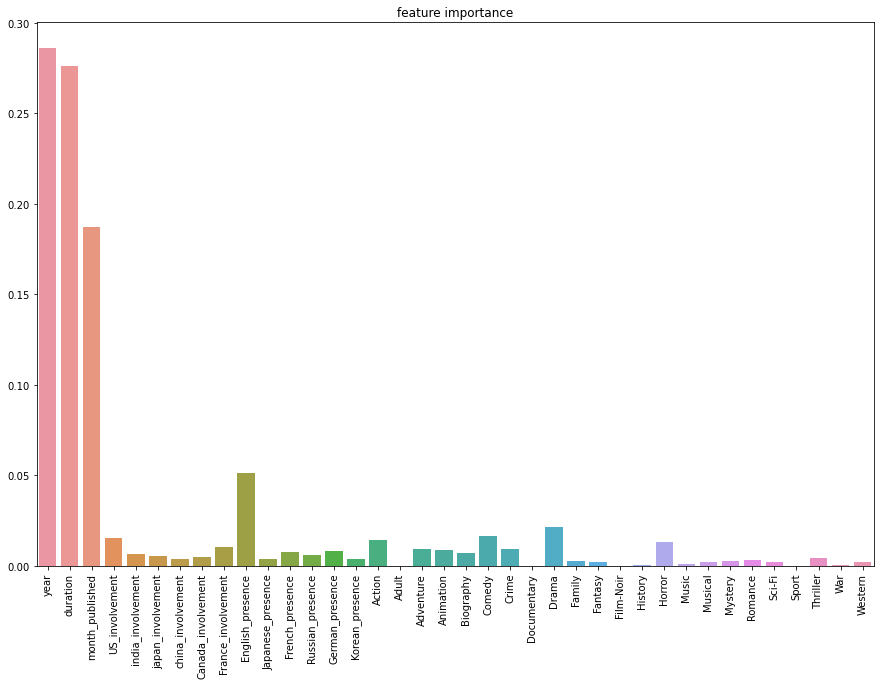

In [13]:
#try a plot to make this easier to see

features = list(X.columns.values)

#set up a dictionary with feature : importance key value pairs
#one of the features was unused, and 

i_dict1 = {}

for i in range(38):
    i_dict1.update({features[i] : imp_list1[i]})

i1_df = pd.DataFrame(i_dict1, index = [0])

plt.figure(figsize = (15, 10))
plt.title('feature importance')
sn.barplot( data = i1_df)
plt.xticks(rotation = 90)

plt.show()


In [14]:
from sklearn import tree


In [15]:
#Write a loop to try some different tree depths

train_scores = []
test_scores = []

for s in range(4, 49, 4):
    iter_tree = DecisionTreeClassifier(max_depth = s)
    iter_tree.fit(X_tr_scale, Y_train)
    i_train_ac = iter_tree.score(X_tr_scale, Y_train)
    i_test_ac = iter_tree.score(X_ts_scale, Y_test)
    train_scores.append(i_train_ac)
    test_scores.append(i_test_ac)

print(train_scores)
print(test_scores)

[0.6735102731748226, 0.707552297681353, 0.7400723703623178, 0.7960273951328601, 0.8590486248078147, 0.911198770014443, 0.945877529468404, 0.9656318429594198, 0.9743753008960879, 0.9773415539438741, 0.9780869997359879, 0.9782888913046854]
[0.6742452478568767, 0.6976332463660082, 0.6909709280655982, 0.6702851285874022, 0.6563548266865449, 0.6398155050316809, 0.6328270592620201, 0.6296123742079761, 0.6273294819232202, 0.6274692508386135, 0.6269101751770406, 0.6257920238538949]


In [16]:
#prepare to plot this data

t_deep = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]

f_dict = {'Tree_Depth': t_deep, 'Training_Accuracy': train_scores, 'Test_Accuracy': test_scores}

fit_df = pd.DataFrame(f_dict)

fit_df = fit_df.set_index('Tree_Depth')

fit_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.673510,0.674245
8,0.707552,0.697633
12,0.740072,0.690971
16,0.796027,0.670285
20,0.859049,0.656355
24,0.911199,0.639816
28,0.945878,0.632827
32,0.965632,0.629612
36,0.974375,0.627329


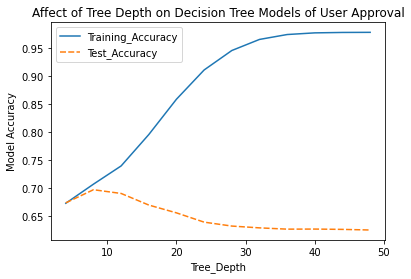

In [17]:
#lineplot in seaborn

sn.lineplot( data = fit_df)
plt.title('Affect of Tree Depth on Decision Tree Models of User Approval')
plt.ylabel('Model Accuracy')
plt.show()

Interestingly the ability of the model to predict the test data diminishes as it fits the training data better. The optimal fitting uses trees with a depth of only 8. This returns results with about the same accuracy as the support vector machine model I did previously. 

In [18]:
#we should hone in on the tree model with a depth of 8 and try to understand how it is working

eight_tree = DecisionTreeClassifier(max_depth = 8)

eight_tree.fit(X_tr_scale, Y_train)

ei_train = eight_tree.score(X_tr_scale, Y_train)

ei_test = eight_tree.score(X_ts_scale, Y_test)

print(f'training accuracy:{ei_train}')
print(f'test accuracy: {ei_test}')


training accuracy:0.707552297681353
test accuracy: 0.6974468878121506


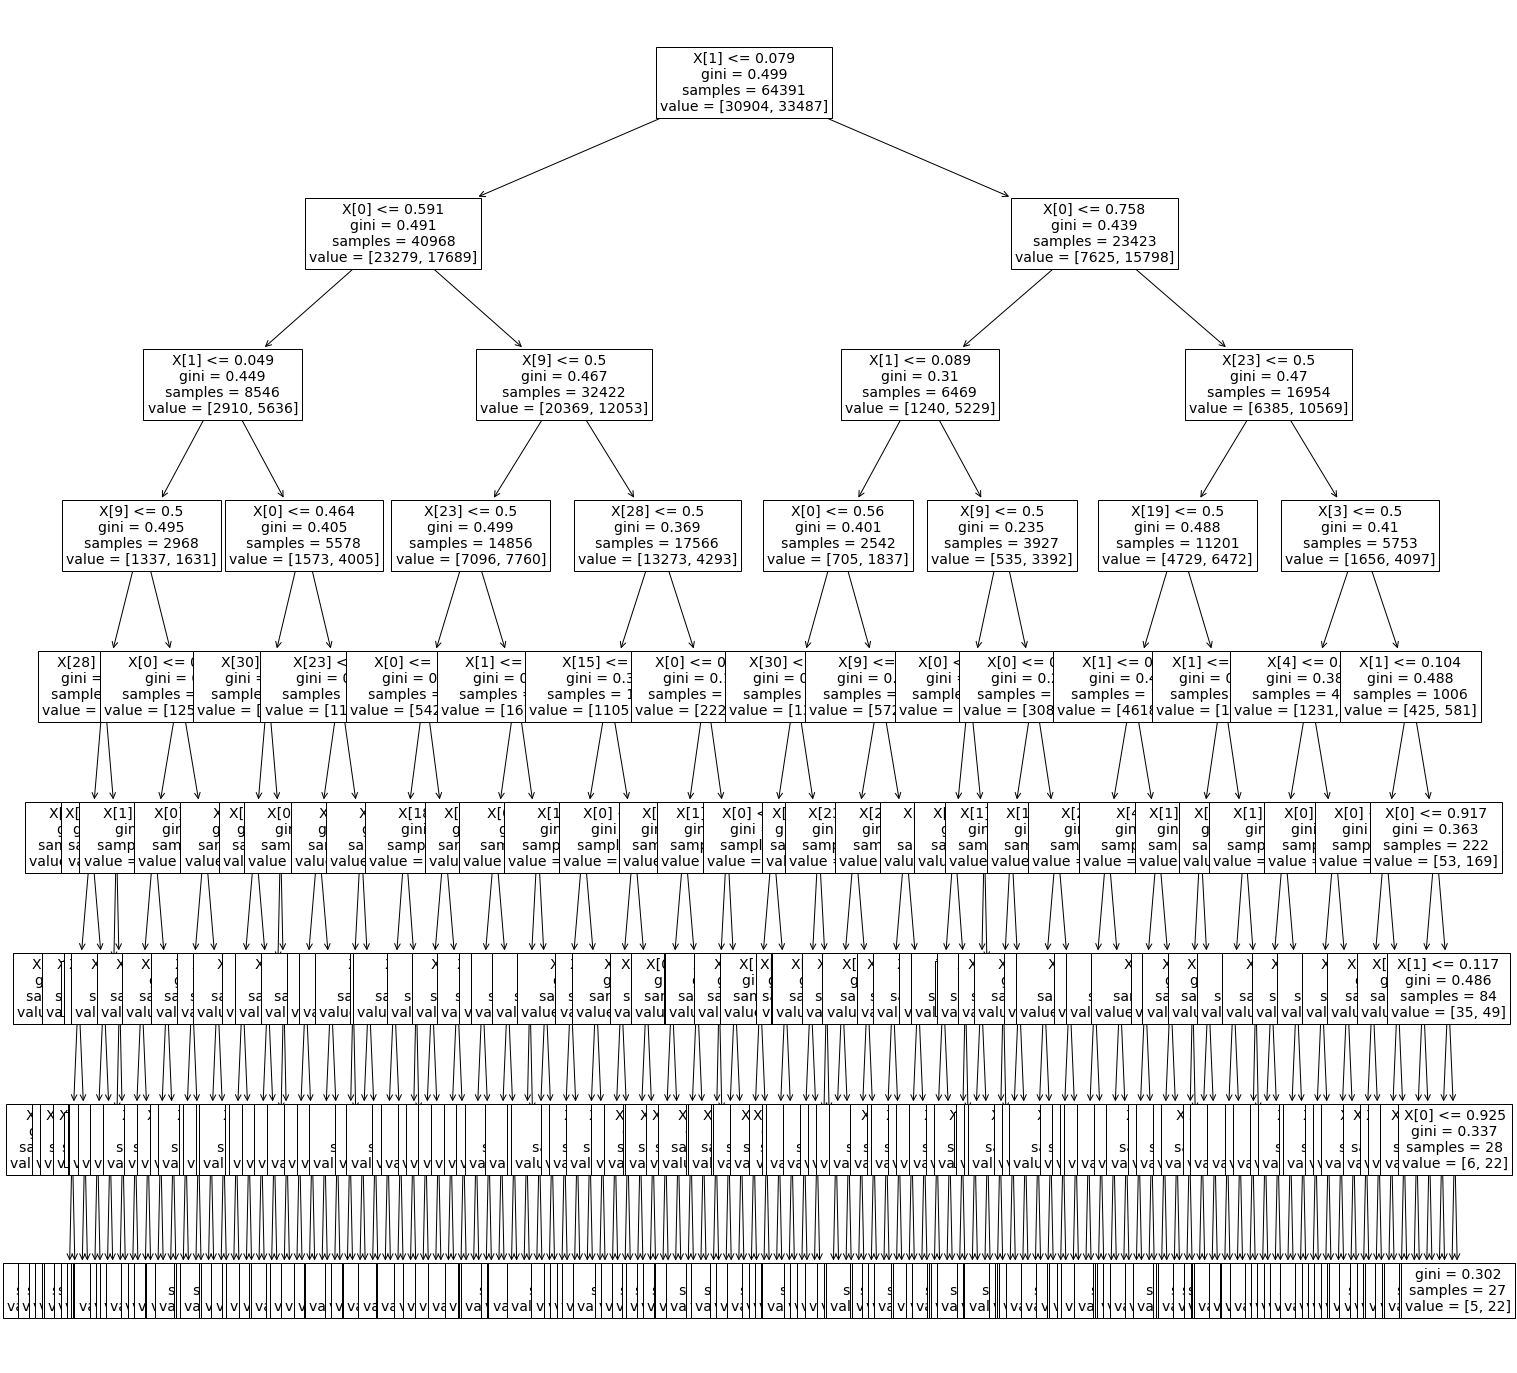

In [19]:
plt.figure(figsize = (25,25))

tree.plot_tree(eight_tree, fontsize = 14)

plt.show()

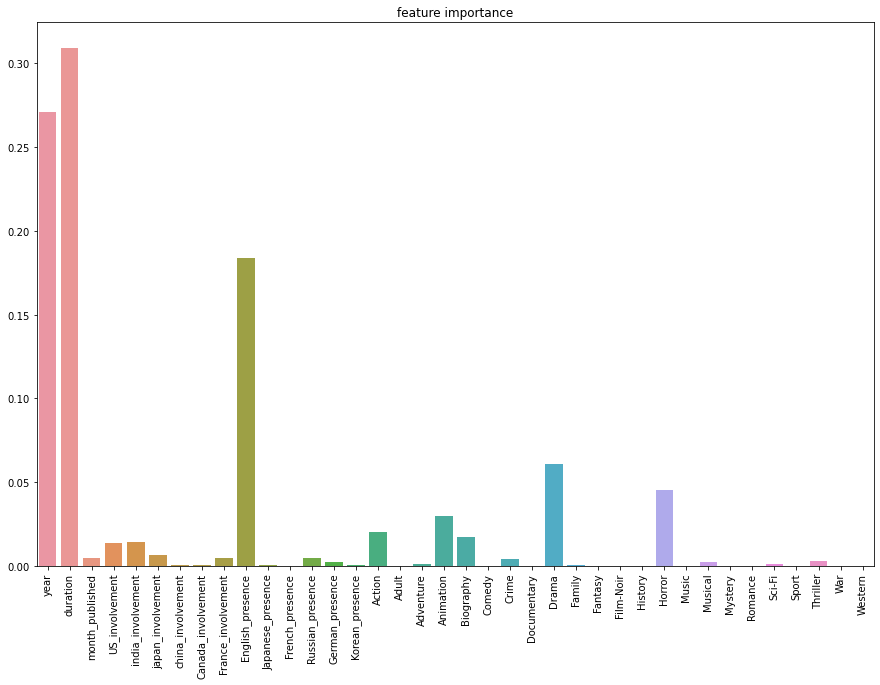

In [20]:
#plot feature importance

i_list_2 = list(eight_tree.feature_importances_)

i_dict2 = {}

for i in range(38):
    i_dict2.update({features[i] : i_list_2[i]})

i2_df = pd.DataFrame(i_dict2, index = [0])

plt.figure(figsize = (15, 10))
plt.title('feature importance')
sn.barplot( data = i2_df)
plt.xticks(rotation = 90)

plt.show()


In [21]:
#Try a random forest model
from sklearn.ensemble import RandomForestClassifier

#random forest works a lot like decision tree, but with a lot of them. I'm going to start with default hyperparameters, 
#just to see what I get

d_rf = RandomForestClassifier()

d_rf = d_rf.fit(X_tr_scale, Y_train)

for_train = d_rf.score(X_tr_scale, Y_train)
for_test = d_rf.score(X_ts_scale, Y_test)

print(f'Training accuracy:{for_train}')
print(f'Testing accuracy:{for_test}')

Training accuracy:0.9782733611840164
Testing accuracy:0.6791837495341037


In [22]:
#Write a loop to try some different tree depths

train_scores2 = []
test_scores2 = []

for t in range(4, 49, 4):
    iter_for = RandomForestClassifier(max_depth = t)
    iter_for.fit(X_tr_scale, Y_train)
    i_train_ac2 = iter_for.score(X_tr_scale, Y_train)
    i_test_ac2 = iter_for.score(X_ts_scale, Y_test)
    train_scores2.append(i_train_ac2)
    test_scores2.append(i_test_ac2)

print(train_scores2)
print(test_scores2)

[0.6968365144197171, 0.7065894301998726, 0.7338758522153717, 0.7803885636191393, 0.8552282151232315, 0.9189793604696308, 0.9606156139833206, 0.9761457346523582, 0.9781491202186641, 0.9782578310633474, 0.9782267708220093, 0.9782578310633474]
[0.6962821468505405, 0.7008945210585166, 0.7091874767051808, 0.7099795005590757, 0.7033171822586657, 0.6948378680581438, 0.687849422288483, 0.6797894148341409, 0.6770872158032054, 0.6755031680954156, 0.6771803950801342, 0.6784383153186732]


In [23]:
f_dict2 = {'Tree_Depth': t_deep, 'Training_Accuracy': train_scores2, 'Test_Accuracy': test_scores2}

fit2_df = pd.DataFrame(f_dict2)

fit2_df = fit2_df.set_index('Tree_Depth')

fit2_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.696837,0.696282
8,0.706589,0.700895
12,0.733876,0.709187
16,0.780389,0.709980
20,0.855228,0.703317
24,0.918979,0.694838
28,0.960616,0.687849
32,0.976146,0.679789
36,0.978149,0.677087


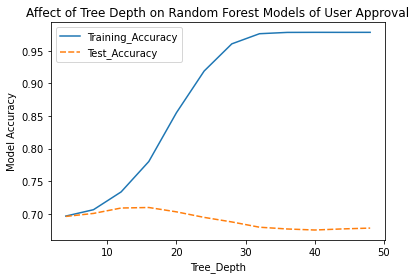

In [24]:
sn.lineplot( data = fit2_df)
plt.title('Affect of Tree Depth on Random Forest Models of User Approval')
plt.ylabel('Model Accuracy')
plt.show()

In [25]:
#Write a loop to try some different tree numbers

train_scores4 = []
test_scores4 = []

for u in range(25, 301, 25):
    iter_for = RandomForestClassifier(max_depth = 16, n_estimators=u)
    iter_for.fit(X_tr_scale, Y_train)
    i_train_ac4 = iter_for.score(X_tr_scale, Y_train)
    i_test_ac4 = iter_for.score(X_ts_scale, Y_test)
    train_scores4.append(i_train_ac4)
    test_scores4.append(i_test_ac4)

print(train_scores4)
print(test_scores4)

[0.7789753226382569, 0.7806991660325201, 0.7811961298939293, 0.7825472503921356, 0.7781366961221289, 0.7808544672392105, 0.7809165877218865, 0.7820192262893882, 0.7815688527899862, 0.7796431178270256, 0.7814446118246339, 0.7818018046000217]
[0.709327245620574, 0.7089079388743943, 0.7104919865821842, 0.7096999627282893, 0.7091874767051808, 0.7096999627282893, 0.7105851658591129, 0.7108647036898994, 0.7105851658591129, 0.7110044726052925, 0.7113306000745434, 0.7113771897130078]


In [26]:
nestimate = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

f_dict4 = {'n_estimators': nestimate, 'Training_Accuracy': train_scores4, 'Test_Accuracy': test_scores4}

fit4_df = pd.DataFrame(f_dict4)

fit4_df = fit4_df.set_index('n_estimators')

fit4_df

,Training_Accuracy,Test_Accuracy
n_estimators,,
25,0.778975,0.709327
50,0.780699,0.708908
75,0.781196,0.710492
100,0.782547,0.709700
125,0.778137,0.709187
150,0.780854,0.709700
175,0.780917,0.710585
200,0.782019,0.710865
225,0.781569,0.710585


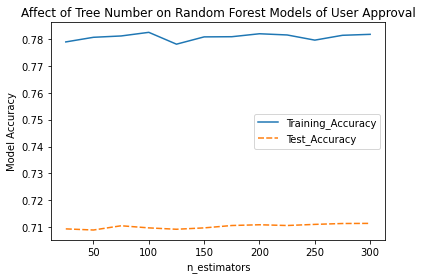

In [27]:
sn.lineplot( data = fit4_df)
plt.title('Affect of Tree Number on Random Forest Models of User Approval')
plt.ylabel('Model Accuracy')
plt.show()

In [28]:
#we should hone in on the tree model with a depth of 8 and try to understand how it is working

sixteen_for = RandomForestClassifier(max_depth = 16)

sixteen_for.fit(X_tr_scale, Y_train)

si_train = sixteen_for.score(X_tr_scale, Y_train)

si_test = sixteen_for.score(X_ts_scale, Y_test)

print(f'training accuracy:{si_train}')
print(f'test accuracy: {si_test}')

training accuracy:0.7817086238760075
test accuracy: 0.7092340663436452


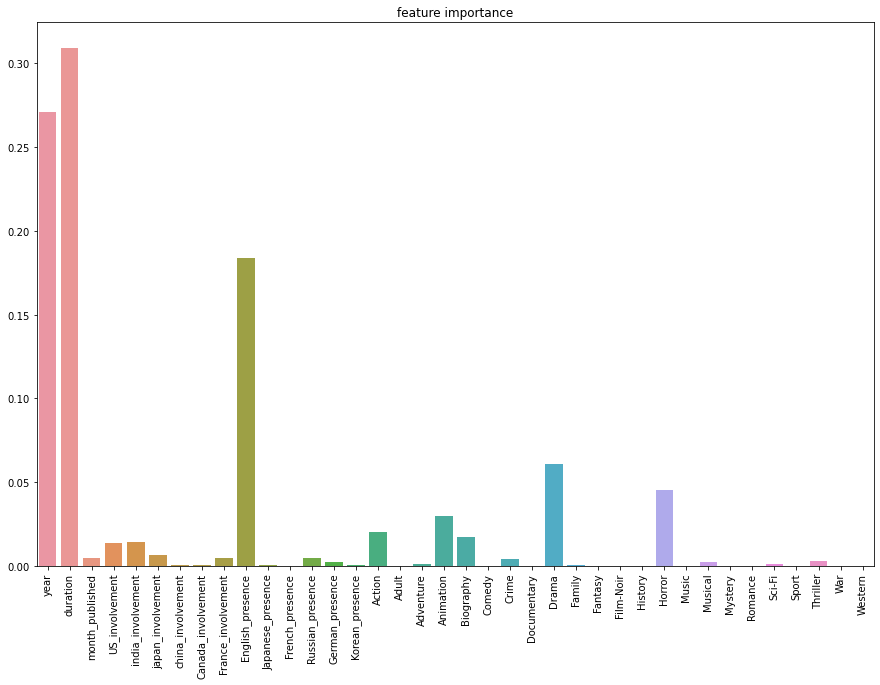

In [29]:
#plot feature importance

i_list_4 = list(sixteen_for.feature_importances_)

i_dict4 = {}

for i in range(38):
    i_dict4.update({features[i] : i_list_2[i]})

i4_df = pd.DataFrame(i_dict4, index = [0])

plt.figure(figsize = (15, 10))
plt.title('feature importance')
sn.barplot( data = i4_df)
plt.xticks(rotation = 90)

plt.show()


In [35]:
#what features have zero importance?

i4_df.T

,0
year,0.270868
duration,0.309105
month_published,0.004478
US_involvement,0.013426
india_involvement,0.014199
japan_involvement,0.006246
china_involvement,0.000614
Canada_involvement,0.000539
France_involvement,0.004747
English_presence,0.183943


War, Romance, Mystery, Music, Film-Noir, Documentary, Comedy, Adult, French_presence. These nine features have no importance in the Random Forest Model. 

In [36]:
#new dataset without the irrelevant features

X_essential = X.drop(columns = ['War', 'Romance', 'Mystery', 'Music', 'Film-Noir', 
                               'Documentary', 'Comedy', 'Adult', 'French_presence'])

X_train_ess, X_test_ess = train_test_split(X_essential, random_state = 42)

X_s_ess = MinMaxScaler().fit(X_train_ess)

X_tr_scale_ess = X_s_ess.transform(X_train_ess)
X_ts_scale_ess = X_s_ess.transform(X_test_ess)

In [38]:
#rerun sixteen_for

sixteen_for_2 = RandomForestClassifier(max_depth = 16)

sixteen_for_2.fit(X_tr_scale_ess, Y_train)

si_train_ess = sixteen_for_2.score(X_tr_scale_ess, Y_train)

si_test_ess = sixteen_for_2.score(X_ts_scale_ess, Y_test)

print(f'training accuracy:{si_train_ess}')
print(f'test accuracy: {si_test_ess}')

training accuracy:0.7750151418676523
test accuracy: 0.710259038389862


# Machine Learning Analysis on is_outlier 

In [30]:
pred2_df = pd.read_csv('desktop/independant_projects/movie_score_predictor/ML_dataset2.csv')

pred2_df.head()

,year,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,English_presence,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,genre_complexity,UK_involvement,is_outlier
0,1894,45,10,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1906,70,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
2,1911,53,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1912,100,11,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0
4,1911,68,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [31]:
#redo the train test split manipulations for the new set

Y2 = pred2_df[['is_outlier']].copy()

Y2 = np.ravel(Y2)

X2 = pred2_df.drop(columns = ['is_outlier'])

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state = 42)

X2_s = MinMaxScaler().fit(X2_train)

X2_tr_scale = X2_s.transform(X2_train)
X2_ts_scale = X2_s.transform(X2_test)

In [32]:
#repeat the decision tree analysis on tree depth with the new dataset
#Write a loop to try some different tree depths

train_scores2 = []
test_scores2 = []

for s in range(4, 49, 4):
    i2_tree = DecisionTreeClassifier(max_depth = s)
    i2_tree.fit(X2_tr_scale, Y2_train)
    i2_train_ac = i2_tree.score(X2_tr_scale, Y2_train)
    i2_test_ac = i2_tree.score(X2_ts_scale, Y2_test)
    train_scores2.append(i_train_ac)
    test_scores2.append(i_test_ac)

print(train_scores2)
print(test_scores2)


[0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854]
[0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949, 0.6257920238538949]


In [33]:
f_dict3 = {'Tree_Depth': t_deep, 'Training_Accuracy': train_scores2, 'Test_Accuracy': test_scores2}

fit3_df = pd.DataFrame(f_dict3)

fit3_df = fit3_df.set_index('Tree_Depth')

fit3_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.978289,0.625792
8,0.978289,0.625792
12,0.978289,0.625792
16,0.978289,0.625792
20,0.978289,0.625792
24,0.978289,0.625792
28,0.978289,0.625792
32,0.978289,0.625792
36,0.978289,0.625792


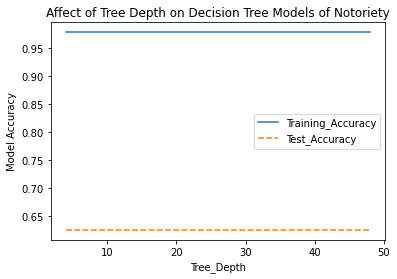

In [34]:
sn.lineplot( data = fit3_df)
plt.title('Affect of Tree Depth on Decision Tree Models of Notoriety')
plt.ylabel('Model Accuracy')
plt.show()